# CS312 Final Project

## Random Forest Regression and Time-Series Analysis on Global Energy Patterns Over Time

Victoria DelaCruz - CS312 - April 14, 2024

# Project Description

This project utilizes random forest regression and time-series analysis machine learning methods to predict energy consumption levels in different countries. The outcome variable for both models is *Primary energy consumption levels per capita (kWh/person)*, which is energy consumption per person in kilowatt-hours. The data and project touches on the U.N. Sustainable Development Goal 7, Affordable and Clean Energy, which aims to ensure access to affordable, reliable, sustainable, and modern energy for all. Both machine learning methods have the potential to inform policy-making decisions, regulations, and perspectives through visualized consumption trends and predictions. Furthermore, it could influence resource allocation and financial aid support to different countries from the U.N. or other sources of income.

## The Dataset

The dataset was retrieved from Kaggle and is called *Global Data on Sustainable Energy (2000-2020)*. It contains data for 176 different countries around the world and includes different environmental, energy, financial support, and economic measures or variables. Overall, there are 21 columns and 3,649 rows. The data was gathered from several sources including the World Bank and International Energy Agency website, but majority of the data orignated from Our World in Data. A description of each variable/measure in this dataset can be found at the dataset link.

Dataset link: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy/data

# Imports, Loading in Data, and Exploratory Data Analysis

In [1]:
!pip install statsmodels
!pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.tree import plot_tree
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn import linear_model

from pandas import to_datetime
import datetime
from datetime import datetime

import pmdarima as pm
from pmdarima.model_selection import train_test_split
import itertools
import warnings

from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00


In [2]:
global_data = pd.read_csv("drive/MyDrive/Colab Notebooks/CS312/data/global-data-on-sustainable-energy (1).csv") # reading in the dataset

## Exploring the Data

In [ ]:
global_data.head() # looking at the first 5 rows

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [ ]:
global_data.info() # general info on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

Note: you can tell if any column has missing values from the # of *Non-Nulls* given in the above result!

### NA Values

After realizing that some columns have larger amounts of NA values than others, I wanted to explore this further to see how I should proceed with handling missing values.

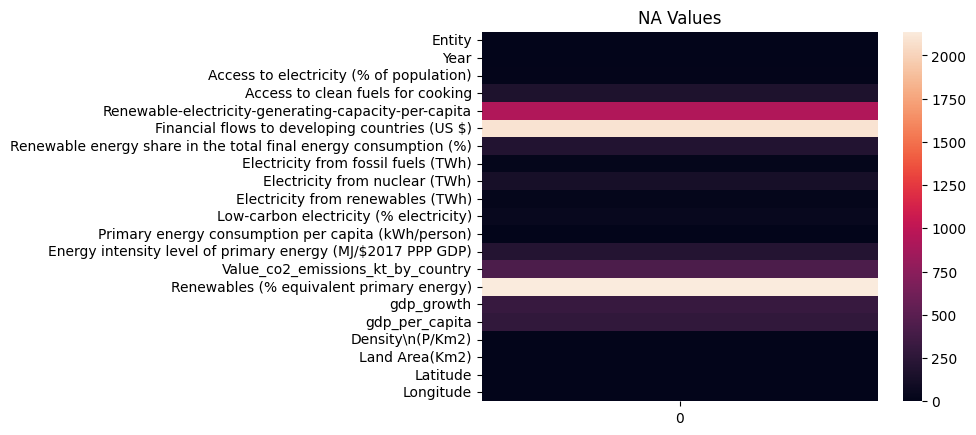

In [ ]:
na_values = pd.DataFrame(global_data.isna().sum()) # looking at the # of NA values per column
na_heatmap = sns.heatmap(na_values) # creating a heatmap of where NA values are
plt.title('NA Values')
plt.show()

In [ ]:
na_values # how many NA values does each column have

,0
Entity,0
Year,0
Access to electricity (% of population),10
Access to clean fuels for cooking,169
Renewable-electricity-generating-capacity-per-capita,931
Financial flows to developing countries (US $),2089
Renewable energy share in the total final energy consumption (%),194
Electricity from fossil fuels (TWh),21
Electricity from nuclear (TWh),126
Electricity from renewables (TWh),21


I recognize that I will have to either drop or impute the NA values in my dataset to proceed with the machine learning methods, which will happen as we move further along in this project.

Columns *Financial flows to developing countries (US $)* and *Renewables (% equivalent primary energy)* are missing approximately 55% of its values.

NA VALUES ARTICLES:
https://ngugijoan.medium.com/handling-missing-values-data-science-7b8e302264ee#:~:text=Deleting%20columns%20with%20missing%20values,we%20can%20delete%20these%20columns.

https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/



Below I drop columns Lat. and Long. as I am not interested in the coordinates of the countries. I create a new variable with my data called *clean_data*.

In [3]:
clean_data = global_data.drop(columns=['Latitude', 'Longitude']) # dropping columns
clean_data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0


### Top 5 Energy-Consuming Countries per Capita vs. Overall

I chose the Primary energy consumption per capita variable as my target variable as it places the countries on a fairer scale for comparison. However, I did find it interesting that this dataset collected both per capita and overall energy consumption values, so I decided to explore the top 5 countries for both.

In [ ]:
countries = global_data['Entity'].unique().tolist() # looking at what countries are in this dataset

In [ ]:
len(countries) # how many countries are there in this dataset

176

Text(0.5, 1.0, 'Top 5 Energy-Consuming Countries per Capita')

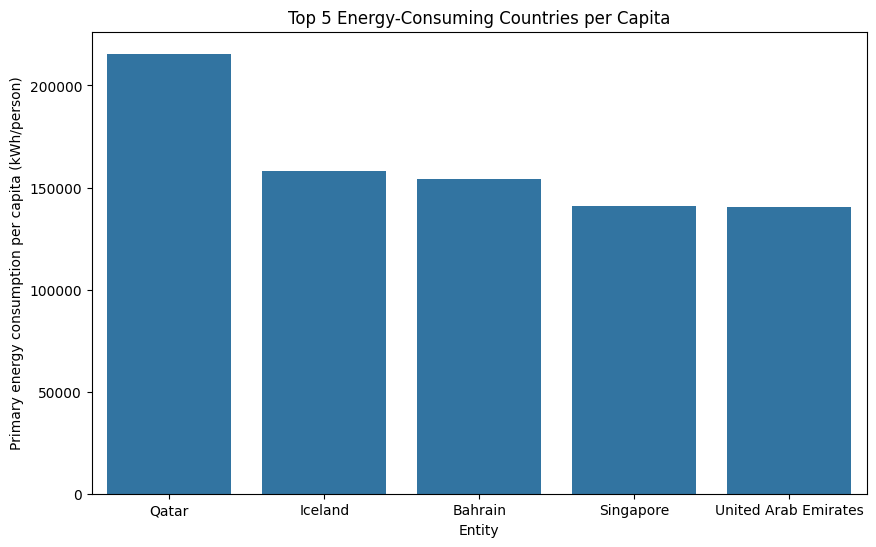

In [ ]:
country_mean = clean_data.groupby(['Entity'])[['Primary energy consumption per capita (kWh/person)']].mean() # getting the average per capita levels and grouping by country
country_mean_top_5 = pd.DataFrame(country_mean['Primary energy consumption per capita (kWh/person)'].nlargest(n=5)) # selecting the 5 largest/highest per capita consuming countries
plt.figure(figsize=(10, 6)) # adjusting plot size
sns.barplot(x = 'Entity', y = 'Primary energy consumption per capita (kWh/person)', data = country_mean_top_5).set_title("Top 5 Energy-Consuming Countries per Capita")

To see the top 5 energy-consuming countries overall, I'm going to get the average of the *Value_co2_emissions_kt_by_country* column for each country.

Similar to the previous plot, first, we group the data by country/entity, then get the average. Then, get only the top 5 countries, and create a bar plot.

Text(0.5, 1.0, 'Top 5 Energy-Consuming Countries Overall')

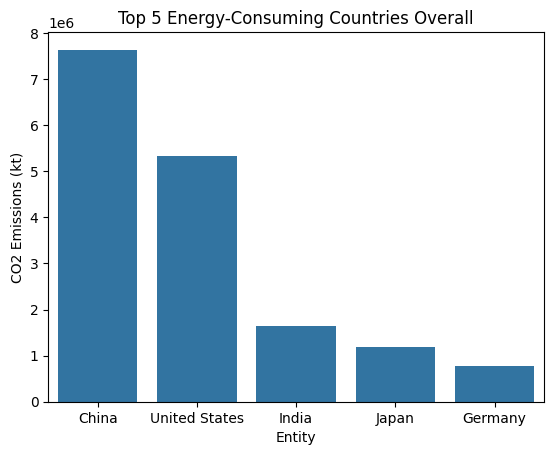

In [ ]:
country_mean_overall = clean_data.groupby(['Entity'])[['Value_co2_emissions_kt_by_country']].mean()
country_mean_overall_top_5 = pd.DataFrame(country_mean_overall['Value_co2_emissions_kt_by_country'].nlargest(n=5))
plt.ylabel("CO2 Emissions (kt)")
sns.barplot(x = 'Entity', y = 'Value_co2_emissions_kt_by_country', data = country_mean_overall_top_5).set_title("Top 5 Energy-Consuming Countries Overall")

As we can see, the both measures do not share any of the same 5 top countries. This reaffirms my decision to use the per capita measurement as my target variable.

### Exploring Energy Consumption Over Time by Top 5 Countries

Since we are going to be predicting and forecasting data, let's see the energy consumption trends per capita for the top 5 countries.

Coding References:
https://seaborn.pydata.org/examples/faceted_lineplot.html
https://stackoverflow.com/questions/63509519/how-can-i-add-a-title-to-a-relplot-in-seaborn


In [ ]:
clean_data['Year']=clean_data['Year'].astype(str) # years were showing up as decimals, changed it to string.
clean_data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0


In [6]:
clean_data_kiribati = clean_data[clean_data['Entity'] == "Kiribati"]
clean_data_kiribati.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
1765,Kiribati,2000,55.124897,1.6,0.74,NaN,55.85,0.01,0.0,0.0,0.0,1636.9808,5.07,30.000000,NaN,6.250000,796.803204,147,811.0
1766,Kiribati,2001,56.919025,1.7,0.72,NaN,55.60,0.01,0.0,0.0,0.0,1370.5415,5.00,30.000000,NaN,-1.470588,735.069106,147,811.0
1767,Kiribati,2002,58.705566,1.7,0.71,NaN,49.11,0.01,0.0,0.0,0.0,1968.1482,5.64,39.999999,NaN,3.787463,826.916865,147,811.0
1768,Kiribati,2003,60.486877,1.8,0.70,NaN,48.78,0.02,0.0,0.0,0.0,2004.7972,5.75,39.999999,NaN,2.006325,1015.667006,147,811.0
1769,Kiribati,2004,62.265297,1.9,2.24,NaN,46.99,0.02,0.0,0.0,0.0,2104.4172,6.16,50.000001,NaN,-1.629360,1131.152504,147,811.0


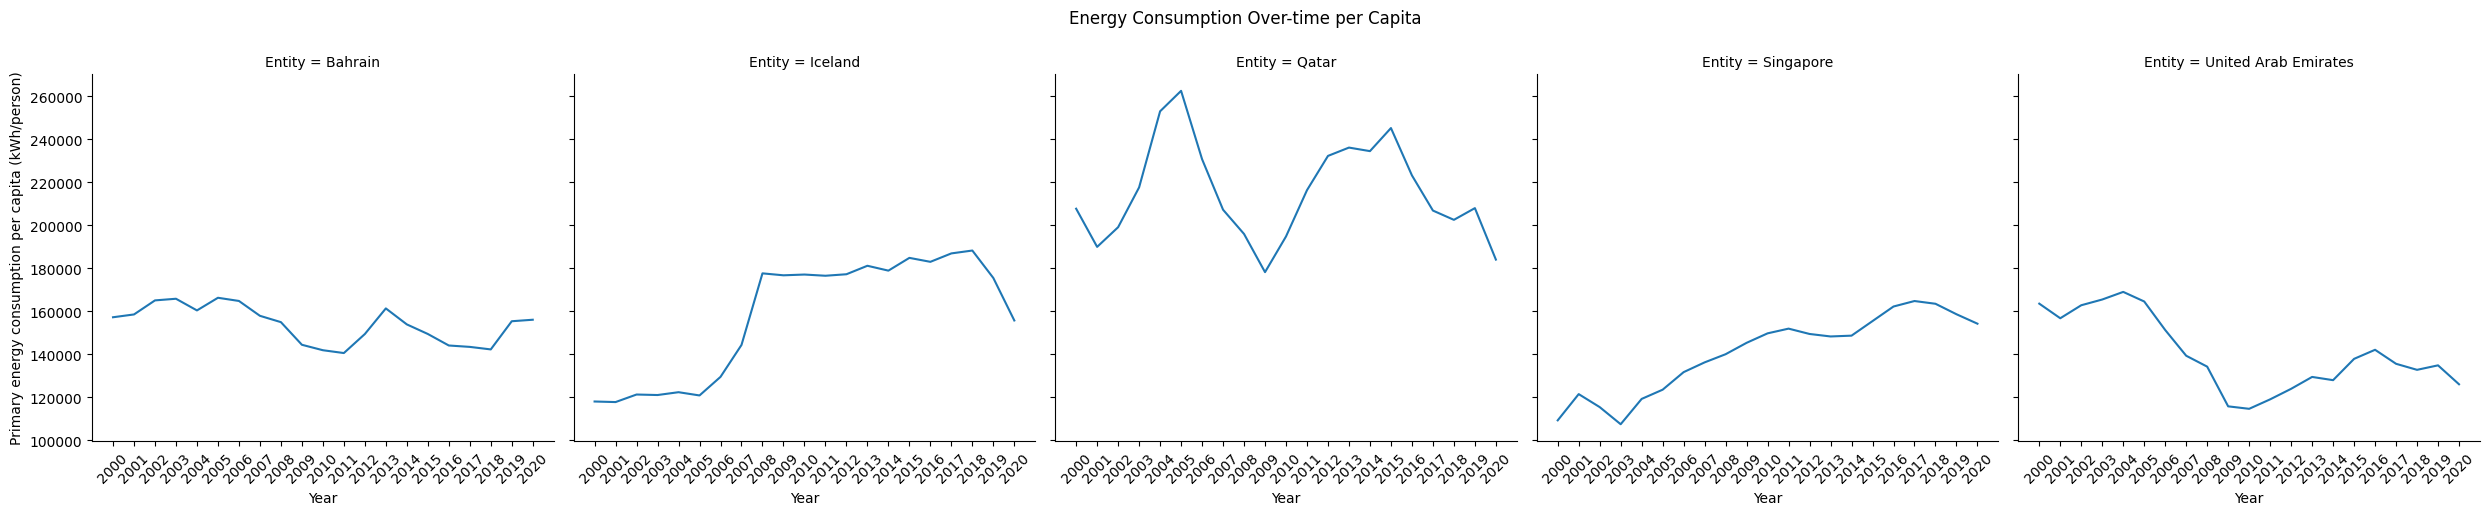

In [ ]:
top_5 = pd.DataFrame(clean_data[clean_data['Entity'].isin(['Qatar', 'Iceland', 'Bahrain', 'Singapore', 'United Arab Emirates'])]) # subsetting for top 5 countries
top_5 = top_5[['Entity', 'Year','Primary energy consumption per capita (kWh/person)']] # selecting specific columns
top5_plot = sns.relplot(
    data = top_5,
    x = "Year",
    y = "Primary energy consumption per capita (kWh/person)",
    kind = "line",
    col = "Entity"
)
top5_plot.fig.suptitle("Energy Consumption Over-time per Capita")
top5_plot.fig.subplots_adjust(top=0.85)
top5_plot.set_xticklabels(rotation=45)


After creating this plot, I thought it was interesting how much energy consumption levels fluctuate over time. This leads me to think about how this specific data/variable was collected over time, which might explain for significant decreases or increases if measures or protocols were changed. Furthermore, I also wonder what events may have happened for the countries during the fluctuations as well, such as natural disasters, economic depressions or successes, etc.

**This concludes the exploratory data analysis portion of this project.**

# Why Random Forest Regression?

Random forest regression is used for this project as this dataset may contain non-linear relationships between the several variables that will be looked at. Furthermore, is a robust ML method as it uses the averages from multiple decision trees (or an ensemble of decision trees).

This ML method also showcases feature importance, where we can see which variables affect the target variable the most (for example, what is the driving factor for primary energy consumption per capita, the target variable?). In fancier words, which attribute leads to the "highest reduction in variance"?

Sources: https://medium.com/@roiyeho/random-forests-98892261dc49
https://medium.com/@roiyeho/decision-trees-part-2-72adc626cca7

### What is the goal?
The goal is to build a regression tree to predict energy levels in different countries given different economic, energy, and environmental factors.

Code Source: https://medium.com/@theclickreader/random-forest-regression-explained-with-implementation-in-python-3dad88caf165

## Data Prep for Random Forest Regression

Although we checked for NA values previously, I wanted to double-check the target variable for NA values as it would be very bad if there were!

In [4]:
clean_data['Primary energy consumption per capita (kWh/person)'].isna().sum() # checking for NA values in target variable

0

In [7]:
clean_data_kiribati['Primary energy consumption per capita (kWh/person)'].isna().sum() # checking for NA values in target variable

0

In [ ]:
clean_data_kiribati.isna().sum()

In [ ]:
clean_data.isna().sum()

,0
Entity,0
Year,0
Access to electricity (% of population),10
Access to clean fuels for cooking,169
Renewable-electricity-generating-capacity-per-capita,931
Financial flows to developing countries (US $),2089
Renewable energy share in the total final energy consumption (%),194
Electricity from fossil fuels (TWh),21
Electricity from nuclear (TWh),126
Electricity from renewables (TWh),21


Below I was interested in seeing what was the range of values for the target variable, which would be helpful in understanding the results of the evaluation metrics as well.

In [ ]:
clean_data['Primary energy consumption per capita (kWh/person)']

In [8]:
clean_data_kiribati['Primary energy consumption per capita (kWh/person)']

,Primary energy consumption per capita (kWh/person)
1765,1636.9808
1766,1370.5415
1767,1968.1482
1768,2004.7972
1769,2104.4172
1770,2702.9736
1771,2949.2144
1772,2641.9128
1773,2903.1602
1774,2485.8700


Next, we separate the *features* and *target* for the random forest regression model. To do so, we drop the entity, year, and target variable columns from the dataset and assign it to *features*. Then we subset just the target variable and assign it to *target*.

In [9]:
features = clean_data.drop(['Entity','Year','Primary energy consumption per capita (kWh/person)'], axis=1) # dropping unwanted columns
target = clean_data['Primary energy consumption per capita (kWh/person)'] # selecting specific column

In [ ]:
target

,Primary energy consumption per capita (kWh/person)
0,302.59482
1,236.89185
2,210.86215
3,229.96822
4,204.23125
...,...
3644,3227.68020
3645,3068.01150
3646,3441.98580
3647,3003.65530


In [10]:
features_k = clean_data_kiribati.drop(['Entity','Year','Primary energy consumption per capita (kWh/person)'], axis=1) # dropping unwanted columns
target_k = clean_data_kiribati['Primary energy consumption per capita (kWh/person)'] # selecting specific column

In [11]:
target_k

,Primary energy consumption per capita (kWh/person)
1765,1636.9808
1766,1370.5415
1767,1968.1482
1768,2004.7972
1769,2104.4172
1770,2702.9736
1771,2949.2144
1772,2641.9128
1773,2903.1602
1774,2485.8700


Reference: https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

I ran into an error when running the code for feature importance, so I found the code below to replace/remove all commas in the features columns.

In [ ]:
features.replace(',','', regex=True, inplace=True) # removing all commas from the dataset

In [12]:
features_k.replace(',','', regex=True, inplace=True) # removing all commas from the dataset

In [13]:
features_k

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
1765,55.124897,1.6,0.74,NaN,55.85,0.01,0.0,0.0,0.0,5.07,30.000000,NaN,6.250000,796.803204,147,811.0
1766,56.919025,1.7,0.72,NaN,55.60,0.01,0.0,0.0,0.0,5.00,30.000000,NaN,-1.470588,735.069106,147,811.0
1767,58.705566,1.7,0.71,NaN,49.11,0.01,0.0,0.0,0.0,5.64,39.999999,NaN,3.787463,826.916865,147,811.0
1768,60.486877,1.8,0.70,NaN,48.78,0.02,0.0,0.0,0.0,5.75,39.999999,NaN,2.006325,1015.667006,147,811.0
1769,62.265297,1.9,2.24,NaN,46.99,0.02,0.0,0.0,0.0,6.16,50.000001,NaN,-1.629360,1131.152504,147,811.0
1770,69.676410,2.0,2.59,NaN,41.47,0.02,0.0,0.0,0.0,6.64,70.000000,NaN,4.951632,1214.635603,147,811.0
1771,68.800000,2.1,2.64,NaN,39.45,0.02,0.0,0.0,0.0,7.11,70.000000,NaN,-0.049295,1168.473302,147,811.0
1772,67.607220,2.3,2.71,NaN,44.60,0.02,0.0,0.0,0.0,6.66,59.999999,NaN,2.034947,1374.395199,147,811.0
1773,69.398730,2.6,2.74,NaN,41.53,0.02,0.0,0.0,0.0,7.37,59.999999,NaN,-2.091437,1428.134977,147,811.0
1774,64.190000,2.9,2.64,5150000.0,44.60,0.02,0.0,0.0,0.0,6.66,59.999999,NaN,0.802810,1312.023443,147,811.0


### Handling Missing Values

Based on different articles I've read, I decided that imputing all missing values with the mean would suffice for this project.

To do this, I used the SimpleImputer function from sklearn and imputed the values using the mean or average, imputed the NA values, and stored it in *features_imputed*.

References:
https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/
https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/



In [17]:
imputer = SimpleImputer(strategy = 'mean') # assigning the imputer w/the mean

In [ ]:
features_imputed = imputer.fit_transform(features) # imputing NA values

In [18]:
features_imputed_k = imputer.fit_transform(features_k) # imputing NA values

In [19]:
len(features_imputed_k)

21

In [20]:
# Dropping unwanted columns and cleaning data with NaN values
features_k_cleaned = features_k.dropna(axis=1, how='all')  # Drop columns with all NaNs

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed_k = imputer.fit_transform(features_k_cleaned)

# Convert imputed array back to DataFrame
features_imputed_k = pd.DataFrame(features_imputed_k, columns=features_k_cleaned.columns)

# Now the column names and data should match
print("Final shape of imputed features:", features_imputed_k.shape)


Final shape of imputed features: (21, 15)


In [ ]:
features_k_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1765 to 1785
Data columns (total 15 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Access to electricity (% of population)                           21 non-null     float64
 1   Access to clean fuels for cooking                                 21 non-null     float64
 2   Renewable-electricity-generating-capacity-per-capita              21 non-null     float64
 3   Financial flows to developing countries (US $)                    6 non-null      float64
 4   Renewable energy share in the total final energy consumption (%)  20 non-null     float64
 5   Electricity from fossil fuels (TWh)                               21 non-null     float64
 6   Electricity from nuclear (TWh)                                    21 non-null     float64
 7   Electricity from renewables (TWh)    

In [ ]:
features_k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1765 to 1785
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Access to electricity (% of population)                           21 non-null     float64
 1   Access to clean fuels for cooking                                 21 non-null     float64
 2   Renewable-electricity-generating-capacity-per-capita              21 non-null     float64
 3   Financial flows to developing countries (US $)                    6 non-null      float64
 4   Renewable energy share in the total final energy consumption (%)  20 non-null     float64
 5   Electricity from fossil fuels (TWh)                               21 non-null     float64
 6   Electricity from nuclear (TWh)                                    21 non-null     float64
 7   Electricity from renewables (TWh)    

### Splitting Data

As with many ML methods, we split our data into training and testing data. We set the test_size to 0.3, where 70% of our data will be used for training and 30% will be used for testing.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_imputed, target, test_size = 0.3) # splitting data

In [21]:
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(features_imputed_k, target_k, test_size = 0.3) # splitting data

In [ ]:
len(features_imputed_k)

21

In [22]:
y_test_k

,Primary energy consumption per capita (kWh/person)
1779,2120.3180
1780,2253.5444
1781,2381.1416
1782,2644.3162
1783,2619.8926
1784,2592.4326
1785,2417.6540


## Fitting the Model

Now we create and fit the random forest regression model. We use the RandomForestRegressor from sklearn and fit the model using the split training data we created previously. I chose 10 as the number of estimators or the # of decision trees that will be run in this model as a starting point.

Source: https://towardsdatascience.com/random-forest-regression-5f605132d19d#:~:text=n_estimators%20%E2%80%94%20the%20number%20of%20decision,The%20default%20value%20is%20MSE.

In [ ]:
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 0) # assigning regressor
rf_model.fit(x_train, y_train) # fitting the model

RandomForestRegressor(n_estimators=10, random_state=0)

In [23]:
rf_model_k = RandomForestRegressor(n_estimators = 10, random_state = 0) # assigning regressor
rf_model_k.fit(x_train_k, y_train_k) # fitting the model

RandomForestRegressor(n_estimators=10, random_state=0)

### Visualizing Random Forest Feature Importance

One of the main reasons why I chose random forest regression was to be able to look at feature importance for this model. Feature importance shows us which variables are significant and provides insight on what is influencing the model and its results.

Sources: https://mljar.com/blog/feature-importance-in-random-forest/
https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

In [ ]:
rf_feature_importances = rf_model.feature_importances_ # getting feature importance
print(rf_feature_importances)

[3.00448414e-02 5.87464808e-02 4.44317481e-03 8.31080582e-05
 2.14188270e-02 7.76099818e-03 5.57224005e-03 6.11543377e-03
 2.71535348e-02 1.60018049e-01 1.71056403e-02 3.17372356e-02
 3.28368138e-03 5.43109658e-01 6.29790474e-02 2.04280492e-02]


In [25]:
rf_feature_importances_k = rf_model_k.feature_importances_# getting feature importance
print(rf_feature_importances_k)

[2.71437462e-02 1.00578971e-01 6.43984043e-03 4.04049423e-04
 1.15251886e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.41885852e-01 1.25778815e-01 1.27021399e-02
 7.35413972e-02 0.00000000e+00 0.00000000e+00]


Below we get the names of the features to use when creating our plot.

In [ ]:
rf_features_names = features.columns.tolist() # collecting feature column names
print(rf_features_names)

['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)']


In [26]:
rf_features_names_k = features_imputed_k.columns.tolist() # collecting feature column names
print(rf_features_names_k)
len(rf_features_names_k)

['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)']


15

Text(0.5, 1.0, 'Feature Importance of Random Forest Model')

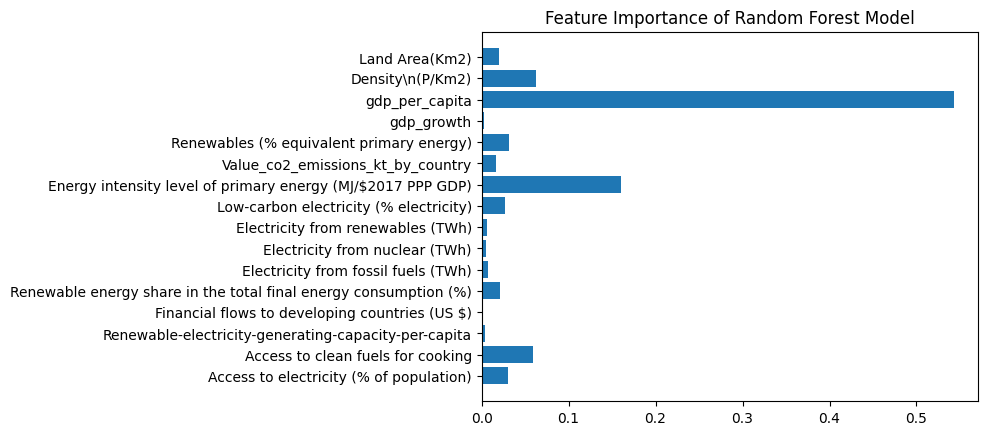

In [ ]:
plt.barh(rf_features_names, rf_feature_importances) # plotting feature importance
plt.title("Feature Importance of Random Forest Model")

Text(0.5, 1.0, 'Feature Importance of Random Forest Model')

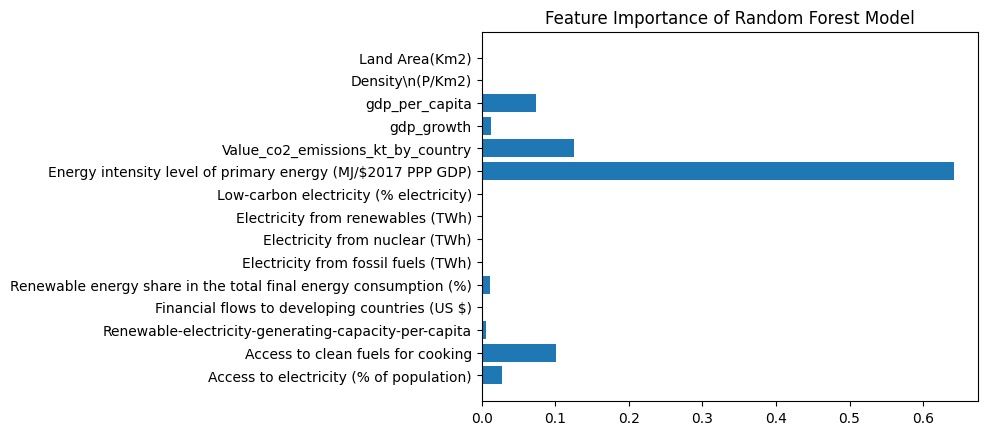

In [ ]:
plt.barh(rf_features_names_k, rf_feature_importances_k) # plotting feature importance
plt.title("Feature Importance of Random Forest Model")

In [ ]:
len(rf_feature_importances_k)

15

In [ ]:
len(rf_features_names_k)

16

In [ ]:
len(rf_feature_importances)

16

In [ ]:
rf_features_names_k

['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density\\n(P/Km2)',
 'Land Area(Km2)']

GDP per capita appears to be the most "important" feature in this model, followed by Energy intensity level of primary energy (energy use per unit of GDP at purchasing power), and access to clean fuels for cooking.

This shows that the economy influences energy consumption more heavily compares to renewables, financial flows, and sources of electricity (insight should be taken with a grain of salt as we could build a better regression model).

### Predictions and Assessment

To assess our regression model, we use mean squared error and mean absolute error as they are commonly used to assess regression machine learning models.

In [ ]:
y_pred = rf_model.predict(x_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

MSE:  534207991.2683355
MAE:  11750.299865532328


In [ ]:
y_pred_k = rf_model_k.predict(x_test_k)
print('MSE: ', mean_squared_error(y_test_k, y_pred_k))
print('MAE: ', mean_absolute_error(y_test_k, y_pred_k))

MSE:  153589.07531176423
MAE:  346.4680157142857


In [ ]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)

**Interpreting Model Metrics**

For both MAE and MSE, the lower the values are the better the model predicts. The evaluation metric results are large for this model, but we also need to consider the context of our data.

Below is a dataframe with the averages or primary energy consumption per capita for each country, which can give us context as to how we should interpret the evaluation results. We use the country_mean variable we created during EDA.

For context, Qatar has an average of 215,565.2061904762 for this variable.

The MSE is pretty high, but the MAE seems okay with this in mind. MSE is penalized more than MAE. For a better model, parameters to the regressor will have to be made.

Resource: https://medium.com/@ooemma83/interpretation-of-evaluation-metrics-for-regression-analysis-mae-mse-rmse-mape-r-squared-and-5693b61a9833



In [ ]:
country_mean_data = pd.DataFrame(country_mean) # creating country mean dataframe for primary energy consumption values
country_mean_data

,Primary energy consumption per capita (kWh/person)
Entity,
Afghanistan,697.268136
Albania,11353.520929
Algeria,12925.532952
Angola,3102.008457
Antigua and Barbuda,32065.486190
...,...
Uzbekistan,19346.599286
Vanuatu,2471.556643
Yemen,2998.960281


To better understand what the random forest and features might look like, I decided to use this visualization code to plot a decision tree from the random forest.
Source for visualization code:
https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [ ]:
plotting_tree = rf_model.estimators_[0] # taking the first decision tree from the model

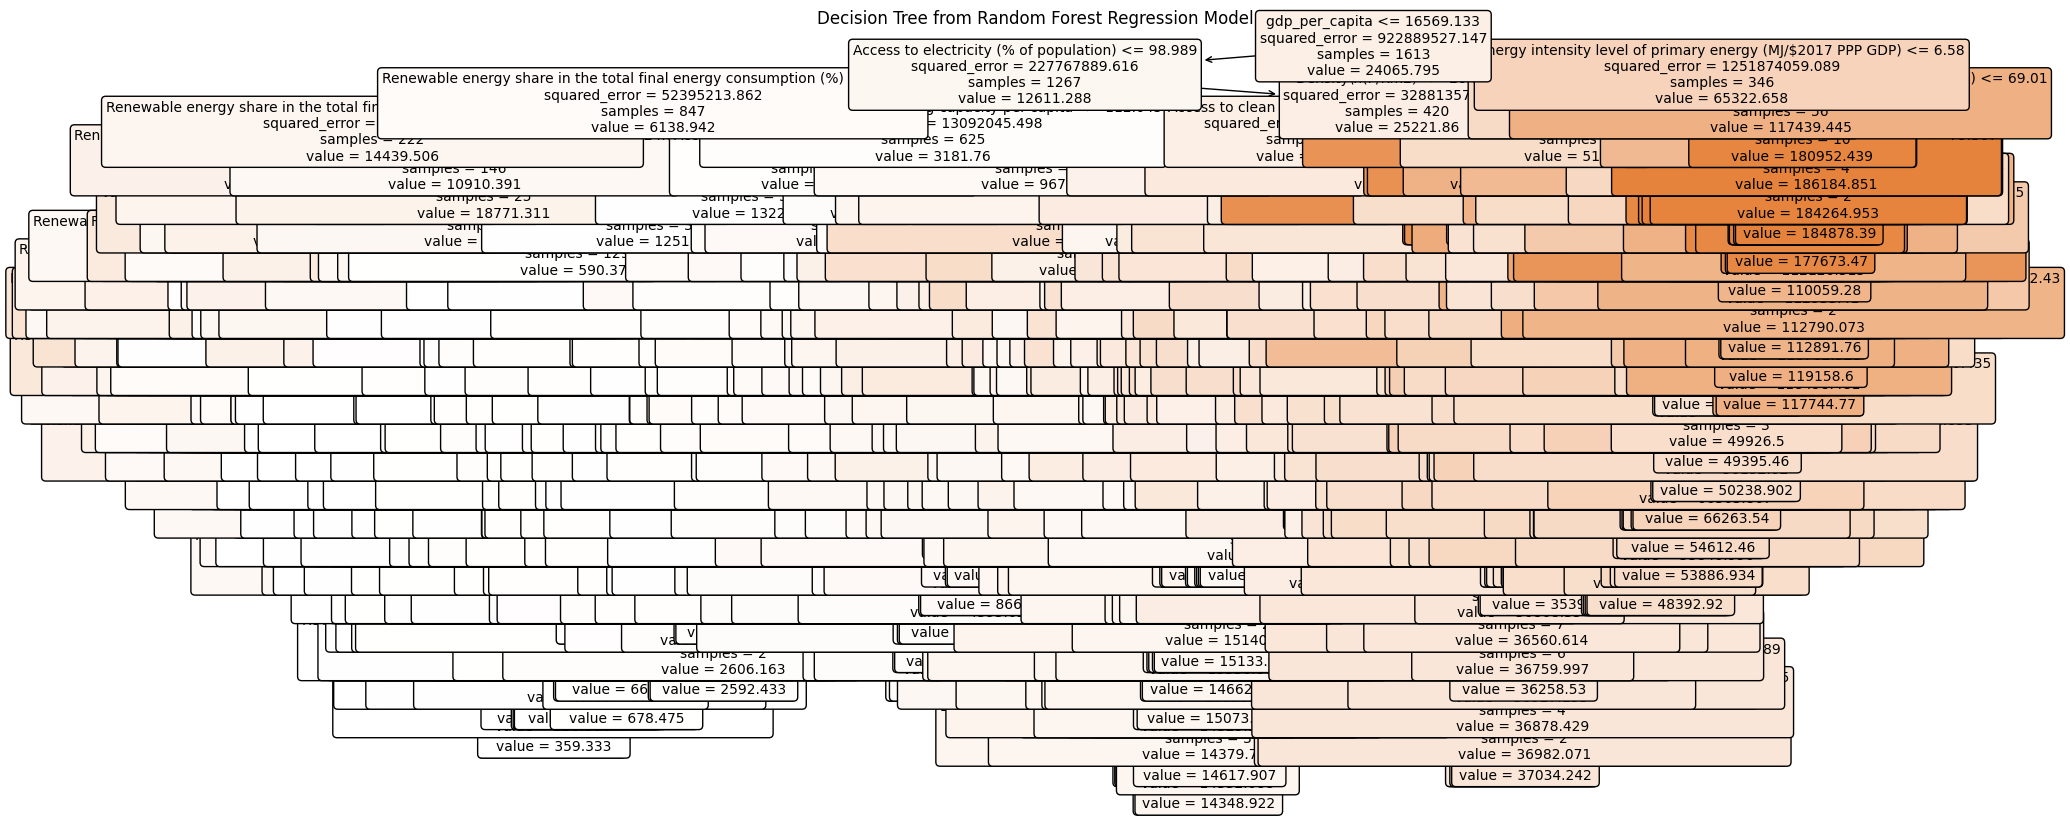

In [ ]:
plt.figure(figsize = (20, 10)) # setting plot size
plot_tree(plotting_tree, feature_names= features.columns.tolist(), filled = True, rounded = True, fontsize=10)
plt.title('Decision Tree from Random Forest Regression Model')
plt.show()

### RF Regression Model 2

For my second random forest regression model, I will fine-tune the parameters to try to get better results.

Sources:
https://stackoverflow.com/questions/18503010/why-is-the-default-value-for-max-features-in-randomforestclassifier-different-th
https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [ ]:
rf_model_2 = RandomForestRegressor(n_estimators = 20, random_state = 0, max_features='auto',
                                   max_depth = 10, max_leaf_nodes = 50) # assigning regressor
rf_model_2.fit(x_train, y_train) # fitting the model

InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [ ]:
y_pred_2 = rf_model_2.predict(x_test)
print('MSE: ', mean_squared_error(y_test, y_pred_2))
print('MAE: ', mean_absolute_error(y_test, y_pred_2))

In [ ]:
rf_mse_2 = mean_squared_error(y_test, y_pred_2)
rf_mae_2 = mean_absolute_error(y_test, y_pred_2)

In [ ]:
rf_eval_mse = pd.DataFrame({
    'Model' : ['RF Model 1', 'RF Model 2'],
    'Value' : [534207991.2683355, 519906171.06371224]
})
rf_eval_mse

In [ ]:
rf_eval_mae = pd.DataFrame({
    'Model' : ['RF Model 1', 'RF Model 2'],
    'Value' : [11750.299865532328, 11157.146706350859]
})
rf_eval_mae

In [ ]:
sns.barplot(data = rf_eval_mae, x = 'Model', y = 'Value')
plt.title('MAE Comparison of RF Regression Models')

In [ ]:
sns.barplot(data = rf_eval_mse, x = 'Model', y = 'Value')
plt.title('MSE Comparison of RF Regression Models')

Visualizing First Decision Tree of the Model

In [ ]:
plotting_tree_2 = rf_model_2.estimators_[0] # taking the first decision tree from the model

In [ ]:
plt.figure(figsize = (40, 25)) # setting plot size
plot_tree(plotting_tree_2, feature_names= features.columns.tolist(), filled = True, rounded = True, fontsize=10)
plt.title('Decision Tree from Random Forest Regression Model')
plt.show()

Predictions and Evaluation

## Discussion

After plotting the decision tree from the random forest, I immediately recognize that I should reduce the number of nodes used. I would also try using grid search to better tune the parameters of the model. As mentioned earlier, this would also assist with the results of the MAE and MSE. The results of feature importance shows that economic factors have a greater influence on consumption levels compared to the rest.

Despite these results, I still think that random forest regression is a great way to predict values if you are using more appropriate parameters for the model.

Source: https://www.geeksforgeeks.org/random-forest-regression-in-python/

# Why Time-Series Analysis?

Time-series analysis is used to analyze data over time and is crucial for prediction and forecasting. It helps in understanding different factors that influence the subject over time and other patterns and relationships.

The time-series analysis model that will be used is the ARIMA model, or Auto-regressive Integrated Moving Average, which focuses on how past values affect future values.

This ML method is similar to other models, however it is limited to two inputs only, meaning the date/time and the value. As we did with the random forest regression model, we'll be predicting the variable *Primary energy consumption per capita (kWh/person)*.

### What is the goal?
The goal is to forecast Primary Energy Consumption per capita values for the next 10 years for each country in this dataset.

Source:
https://www.youtube.com/watch?v=axjgEgBgIY0

### Time-Series Description

As I've learned, time-series has 3 components:

* trend - movement of data
* seasonality - variance
* noise - ups and downs at random intervals

Source: https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

## Data Prep for Time-Series Analysis - Part 1

The code I use to prepare the data for time-series analysis came from this video: https://www.youtube.com/watch?v=axjgEgBgIY0

To prepare our data for time-series analysis, we create a subset of our global_data variable where we only have the country/entity, year, and target variable.

In [27]:
time_data = global_data[['Entity','Year','Primary energy consumption per capita (kWh/person)']] # selecting specific columns
time_data.head()

,Entity,Year,Primary energy consumption per capita (kWh/person)
0,Afghanistan,2000,302.59482
1,Afghanistan,2001,236.89185
2,Afghanistan,2002,210.86215
3,Afghanistan,2003,229.96822
4,Afghanistan,2004,204.23125


In the following code chunk, I convert the Year column to date-time values as most time-series require this format (where it looks like a calendar date).

In [28]:
time_data['Year'] = time_data['Year'].astype(str) + '-01-01' # adding day and month to date
time_data['Year'] = pd.to_datetime(time_data['Year']) # converting to datetime format

time_data.head()

,Entity,Year,Primary energy consumption per capita (kWh/person)
0,Afghanistan,2000-01-01,302.59482
1,Afghanistan,2001-01-01,236.89185
2,Afghanistan,2002-01-01,210.86215
3,Afghanistan,2003-01-01,229.96822
4,Afghanistan,2004-01-01,204.23125


## ARIMA Model

As mentioned previously, ARIMA focuses on how past values affect future values (which is the AR/Autoregression part of AR,I,MA). 'I' stands for integrated, where it makes stationary time series from your data. 'MA', or moving average, models the forecast value as a "linear combination of past error terms".

Resource and code source: https://towardsdatascience.com/creating-an-arima-model-for-time-series-forecasting-ff3b619b848d

## Kiribati + ARIMA Model

For the rest of this project, we're going to focus on building our time-series ARIMA model and training and testing it on primary energy consumption levels per capita for the island country of Kiribati. I chose Kiribati as I was impressed that this dataset had data on island states in Micronesia, such as Kiribati and Palau, where we are usually not represented in most datasets.

### Data Prep for Kiribati + ARIMA Model

First, we are going to subset our data only Kiribati data. Then, we are going to select the columns we want, which is the year and energy levels. Next, we rename the primary energy consumption per capita column to "value" to make it easier as we code.

In [29]:
kiribati = time_data[time_data['Entity'] == "Kiribati"] # subsetting for Kiribati data
kiribati = kiribati[['Year', 'Primary energy consumption per capita (kWh/person)']] # selecting columns
kiribati.rename(columns = {'Primary energy consumption per capita (kWh/person)':'value'}, inplace = True) # renaming column
kiribati.head()

,Year,value
1765,2000-01-01,1636.9808
1766,2001-01-01,1370.5415
1767,2002-01-01,1968.1482
1768,2003-01-01,2004.7972
1769,2004-01-01,2104.4172


We continue prepping our data with the following code:

* converting the *value* column to integer for a cleaner look
* converting the *Year* column to datetime format, as required for time-series analysis and the ARIMA model
* setting the *Year* column as the index so that our *kiribati* datetime object is now one column - which is what we want for our ARIMA model and it allows fo rmanipulations to be performed with respect to the datetime element

Source: https://pandas.pydata.org/docs/user_guide/timeseries.html

In [30]:
kiribati['value'] = kiribati['value'].astype(int) # converting to integer
kiribati['Year'] = pd.to_datetime(kiribati['Year'], infer_datetime_format = True) # converting to datetime
kiribati = kiribati.set_index(['Year']) # setting year to index
kiribati.head()

,value
Year,
2000-01-01,1636
2001-01-01,1370
2002-01-01,1968
2003-01-01,2004
2004-01-01,2104


### Testing for Stationarity

Ensuring your time-series data is stationary is CRUCIAL for time-series analysis, as all the articles and videos say.

What is a stationary time-series?
* A time-series where its properties doesn't depend on the time at which the series was observed; it's important as many time-series models assume that the time-seis IS stationary

How do we test for stationarity?
* You can use the Augmented Dickey-Fuller test (there's an awesome function for this!) where we can determine if it's stationary from the p-value
* If your p-value is below 0.05, your data IS stationary

Source: https://towardsdatascience.com/creating-an-arima-model-for-time-series-forecasting-ff3b619b848d

In [ ]:
adf_test = adfuller(kiribati) # running the ADF test
print('ADF Statistic: ', adf_test[0]) # indexing first result of adf_test which is the adf stat.
print('P-value: ', adf_test[1]) # indexing second result, which is the p-value

ADF Statistic:  -4.400349316409659
P-value:  0.00029641037806929537


According to the above results, our p-value is less than 0.05, which means our data is stationary. If it wasn't, we would have to stationize the data through differencing.

What is differencing?
* involves subtracting the current value of the series from the previous one or from a lagged value

Source: https://www.linkedin.com/advice/0/what-advantages-disadvantages-stationarizing-your-data#:~:text=Differencing%20is%20a%20technique%20to,or%20from%20a%20lagged%20value.

### Splitting Data

Splitting our data for time-series is different than it is for random forest regression, in the sense that it isn't randomized as we will be using this data to forecast certain year - energy level values.

In the splitting code, we convert the values to integer and then select the  80% of the length of the data for our training data. Then, it takes the remaining 20% for testing data (basically, everything except for the first 80).

Source: https://towardsdatascience.com/creating-an-arima-model-for-time-series-forecasting-ff3b619b848d

In [31]:
train_data = kiribati[:int(len(kiribati)*0.8)] # subsetting for 80% of the length of the dataset
test_data = kiribati[int(len(kiribati)*0.8):] # subsetting for the last 20%
print(train_data)

            value
Year             
2000-01-01   1636
2001-01-01   1370
2002-01-01   1968
2003-01-01   2004
2004-01-01   2104
2005-01-01   2702
2006-01-01   2949
2007-01-01   2641
2008-01-01   2903
2009-01-01   2485
2010-01-01   2429
2011-01-01   2205
2012-01-01   2144
2013-01-01   2137
2014-01-01   2120
2015-01-01   2253


### Parameters for ARIMA Model

ARIMA has three parameters:
* p = order of the autoregressive model
* q = order of moving average model
* d = # of differences required to make time-series stationary

Considering that we didn't perform any differences to make our time-series stationary, we'll be setting that to 0 in our model.

To figure out p, we're going to use a partial autocorrelation plot. This helps in seeing the relationship between a data point and its lagged or previous values.

Source: https://towardsdatascience.com/creating-an-arima-model-for-time-series-forecasting-ff3b619b848d
Chat GPT link: https://chat.openai.com/share/60fa8566-2389-4ba5-bca5-68de9beacc54


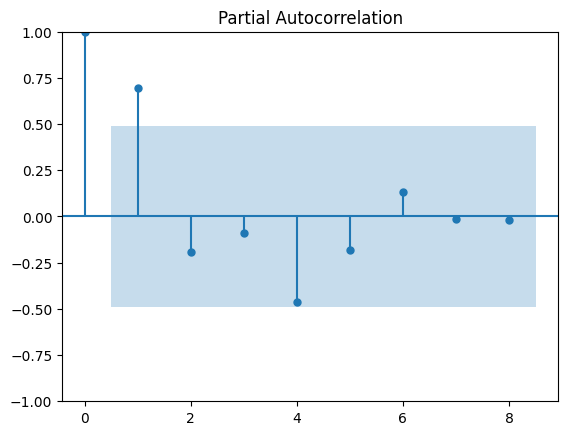

In [ ]:
pacf_plot = sm.graphics.tsa.plot_pacf(train_data) # creating partial autocorrelation plot

From what I understand from the article linked below, we try to look at where it tails off. To me, it looks like it tails off at 4, which is why I set that value for 4 in the ARIMA model. These are challenging to interpret though.

Article: https://medium.com/@ooemma83/how-to-interpret-acf-and-pacf-plots-for-identifying-ar-ma-arma-or-arima-models-498717e815b6

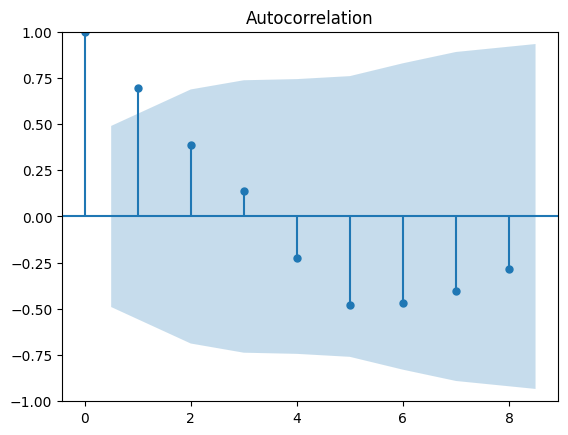

In [ ]:
acf_plot = sm.graphics.tsa.plot_acf(train_data) # creating autocorrelation plot

Above we're trying to figure out q with an autocorrelation plot. This was also challenging to interpret, so for our model we set this value to 1.

### Building the ARIMA Model

Below, we put what we've gathered above together in building the ARIMA model with the ARIMA function. Then, we fit the model.

Code source: https://medium.com/geekculture/time-series-analysis-using-arima-model-with-python-afe4b41bbec8

In [32]:
arima_model = ARIMA(train_data, order = (4, 1, 0)) # building model
arima_model_fit = arima_model.fit() # fitting the model

Now let's visualize our forecasted data with the actual data.

Code source: https://towardsdatascience.com/creating-an-arima-model-for-time-series-forecasting-ff3b619b848d

Text(0.5, 1.0, 'ARIMA Predicted Energy Consumption Values for Kiribati')

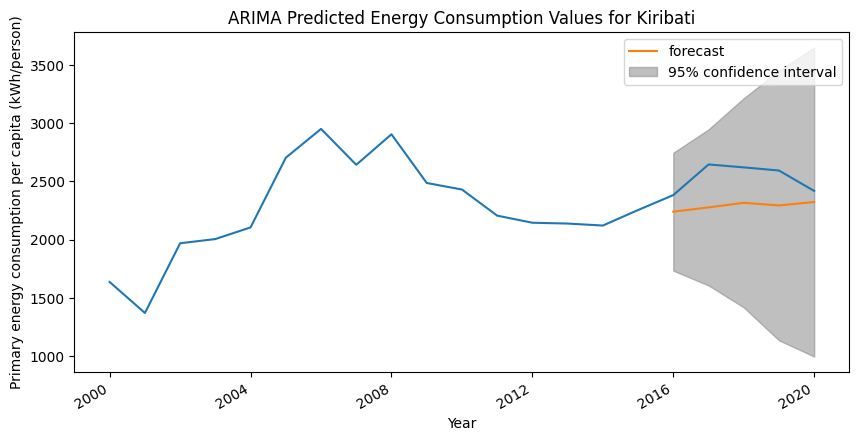

In [38]:
fig, axs = plt.subplots(1, 1, figsize = (10,5)) # setting up our plot
plt.plot(kiribati) # plotting our original data
plot_predict(arima_model_fit, start = len(train_data), end=(len(kiribati)-1), ax=axs) # plotting predicted values
plt.xlabel("Year")
plt.ylabel("Primary energy consumption per capita (kWh/person)")
plt.title("ARIMA Predicted Energy Consumption Values for Kiribati")
#source: https://stackoverflow.com/questions/73112516/arimaresults-object-has-no-attribute-plot-predict-error

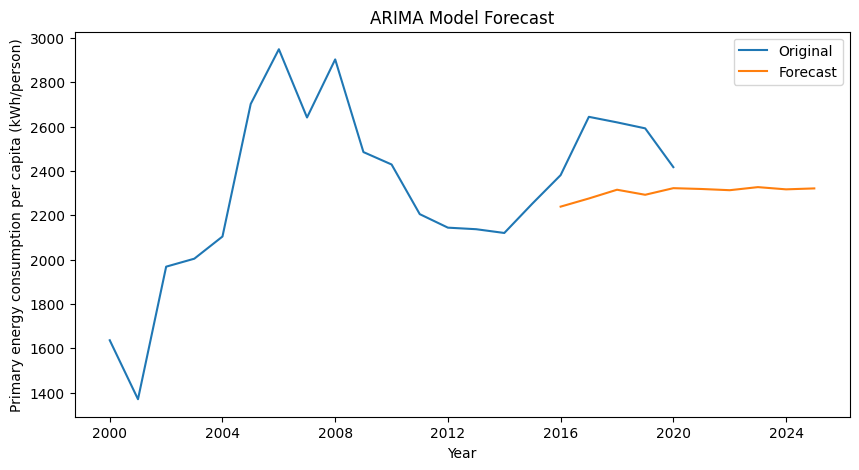

In [34]:
# Setting up the plot
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

# Forecasting the next 10 steps
forecast = arima_model_fit.forecast(steps=10)

# Extracting forecasted values (this should be a Series)
forecast_values = forecast  # Assuming it's already a pandas Series

# Define the last year of your original data (in this case, 2016)
last_year = 2016

# Define the years for the forecasted values
forecast_years = range(last_year + 1, last_year + 1 + len(forecast_values))

# Plotting the original data (assuming the index of 'kiribati' is the years)
axs.plot(kiribati.index, kiribati, label='Original')

# Plotting the forecasted values starting from 2017
axs.plot(forecast_values, label='Forecast')

# Adding legend and showing plot
axs.legend()
plt.title("ARIMA Model Forecast")
plt.xlabel("Year")
plt.ylabel("Primary energy consumption per capita (kWh/person)")
plt.show()


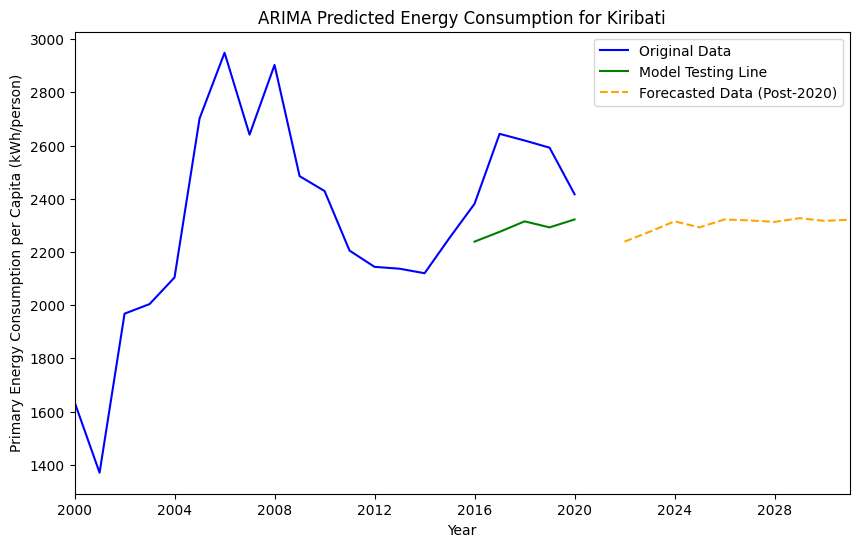

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data up to 2020
ax.plot(kiribati.index, kiribati, label='Original Data', color='blue')

# Plot predictions within the test period
test_start_index = len(train_data)
test_end_index = len(kiribati) - 1
test_predictions = arima_model_fit.predict(start=test_start_index, end=test_end_index)

# Plot the model testing line on the test period
ax.plot(kiribati.index[test_start_index:test_end_index + 1], test_predictions, label='Model Testing Line', color='green')

# Forecast data for the next 10 steps directly beyond the existing data
forecast = arima_model_fit.forecast(steps=10)  # Automatically starts after the last date in kiribati
forecast_values = pd.Series(forecast)

# Create a datetime index for forecasted years starting right after the last year in kiribati (2020)
last_year_in_data = kiribati.index[-1].year
forecast_years = pd.date_range(start=pd.Timestamp(last_year_in_data + 1, 1, 1), periods=10, freq='Y')

# Set the index of forecast_values to be forecast_years
forecast_values.index = forecast_years

# Plot forecasted data beyond 2020
ax.plot(forecast_values.index, forecast_values, label='Forecasted Data (Post-2020)', color='orange', linestyle='--')

# Extend the x-axis to ensure forecast years are visible
ax.set_xlim([kiribati.index[0], forecast_values.index[-1]])

# Customize plot
ax.set_xlabel("Year")
ax.set_ylabel("Primary Energy Consumption per Capita (kWh/person)")
ax.set_title("ARIMA Predicted Energy Consumption for Kiribati")
ax.legend()
plt.show()


In [56]:
forecast

,predicted_mean
2016-01-01,2238.838052
2017-01-01,2275.624246
2018-01-01,2315.097306
2019-01-01,2292.336394
2020-01-01,2322.165565
2021-01-01,2318.443052
2022-01-01,2312.990163
2023-01-01,2326.855798
2024-01-01,2316.833579
2025-01-01,2321.068768


In [35]:
forecast_years

range(2017, 2027)

In [36]:
forecast_values

,predicted_mean
2016-01-01,2238.838052
2017-01-01,2275.624246
2018-01-01,2315.097306
2019-01-01,2292.336394
2020-01-01,2322.165565
2021-01-01,2318.443052
2022-01-01,2312.990163
2023-01-01,2326.855798
2024-01-01,2316.833579
2025-01-01,2321.068768


Our model didn't do so bad compared to the testing data!

## ARIMA Model Evaluation

To evaluate our model, we'll be using mean absolute error, root mean squared error, and mean squared error. I chose these metrics based on the articles below.

Sources: https://stackoverflow.com/questions/64683865/how-can-we-check-the-forecast-accuracy-in-time-series
https://medium.com/@data-overload/understanding-arima-models-a-comprehensive-guide-to-time-series-forecasting-dfc7207f2406

To do this, I stored the forecasted values in a variable so that I can use the same functions from sklearn to calculate the metrics with the test data.

In [57]:
forecast_values = arima_model_fit.forecast(5) # storing forecasted variables

In [58]:
# Mean Absolute Error (MAE)
print('MAE: ', mean_absolute_error(forecast_values, test_data))

# Root Mean Squared Error (RMSE)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(forecast_values, test_data)))

# Mean Squared Error (MSE)
print('MSE: ', (metrics.mean_squared_error(forecast_values, test_data)))


MAE:  241.78768743095307
RMSE:  263.46134818314954
MSE:  69411.88198648274


In [ ]:
# Mean Absolute Error (MAE)
print('MAE: ', mean_absolute_error(forecast_values, test_data))

# Root Mean Squared Error (RMSE)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(forecast_values, test_data)))

# Mean Squared Error (MSE)
print('MSE: ', (metrics.mean_squared_error(forecast_values, test_data)))


As we've talked about before, the lower these values are the better. I am not too impressed, but not too disappointed with these values, considering that the average primary energy consumption level for Kiribati is 2319.750919047619 (got from previous country_mean dataframe).


### Linear Regression with Trendline
SOURCE: https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html


In [ ]:
kiribati

,value
Year,
2000-01-01,1636
2001-01-01,1370
2002-01-01,1968
2003-01-01,2004
2004-01-01,2104
2005-01-01,2702
2006-01-01,2949
2007-01-01,2641
2008-01-01,2903


In [ ]:
kiribati['Time'] = np.arange(len(kiribati.index))
kiribati

,value,Time
Year,,
2000-01-01,1636,0
2001-01-01,1370,1
2002-01-01,1968,2
2003-01-01,2004,3
2004-01-01,2104,4
2005-01-01,2702,5
2006-01-01,2949,6
2007-01-01,2641,7
2008-01-01,2903,8


In [ ]:
x = kiribati.loc[:, ['Time']]
y = kiribati.loc[:, 'value']

In [ ]:
lm_model = LinearRegression()
lm_model.fit(x, y)

LinearRegression()

In [ ]:
y_pred_lm = pd.Series(lm_model.predict(x), index=x.index)
y_pred_lm

Year
2000-01-01    2042.735931
2001-01-01    2070.381385
2002-01-01    2098.026840
2003-01-01    2125.672294
2004-01-01    2153.317749
2005-01-01    2180.963203
2006-01-01    2208.608658
2007-01-01    2236.254113
2008-01-01    2263.899567
2009-01-01    2291.545022
2010-01-01    2319.190476
2011-01-01    2346.835931
2012-01-01    2374.481385
2013-01-01    2402.126840
2014-01-01    2429.772294
2015-01-01    2457.417749
2016-01-01    2485.063203
2017-01-01    2512.708658
2018-01-01    2540.354113
2019-01-01    2567.999567
2020-01-01    2595.645022
dtype: float64

Text(0, 0.5, 'Primary energy consumption per capita (kWh/person)')

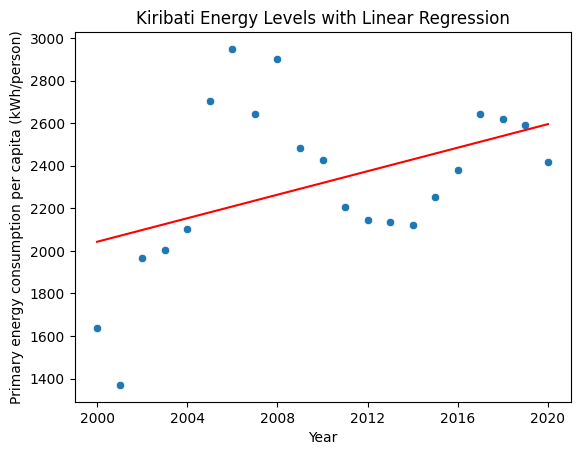

In [ ]:
sns.scatterplot(x = 'Year', y = 'value', data = kiribati)
plt.plot(y_pred_lm, color ='red')
plt.title('Kiribati Energy Levels with Linear Regression')
plt.ylabel('Primary energy consumption per capita (kWh/person)')

In [ ]:
# Mean Absolute Error (MAE)
print('MAE: ', mean_absolute_error(y_pred_lm, y))

# Root Mean Squared Error (RMSE)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_pred_lm, y)))

# Mean Squared Error (MSE)
print('MSE: ', (metrics.mean_squared_error(y_pred_lm, y)))

MAE:  270.7120593692022
RMSE:  343.6180359467642
MSE:  118073.35462791176


In [ ]:
lm_mae = mean_absolute_error(y_pred_lm, y)
lm_rmse = np.sqrt(metrics.mean_squared_error(y_pred_lm, y))
lm_mse = metrics.mean_squared_error(y_pred_lm, y)

In [ ]:
# Mean Absolute Error (MAE)
arima_mae = mean_absolute_error(forecast_values, test_data)

# Root Mean Squared Error (RMSE)
arima_rmse = np.sqrt(metrics.mean_squared_error(forecast_values, test_data))

# Mean Squared Error (MSE)
arima_mse = metrics.mean_squared_error(forecast_values, test_data)

In [ ]:
# creating dataframe
time_series_eval = pd.DataFrame({
    'Model':['Linear Regression', 'ARIMA Model'],
    'MAE' : [lm_mae, arima_mae],
    'RMSE' : [lm_rmse, arima_rmse],
    'MSE' : [lm_mse, arima_mse]
})
time_series_eval
# source : https://discuss.python.org/t/comparison-table-for-rmse-and-mae-using-three-different-models/24946/2

,Model,MAE,RMSE,MSE
0,Linear Regression,270.712059,343.618036,118073.354628
1,ARIMA Model,241.787687,263.461348,69411.881986


In [ ]:
time_series_metrics = pd.DataFrame({
    'Linear Regression' : [lm_mae, lm_rmse, lm_mse],
    'ARIMA Model' : [arima_mae, arima_rmse, arima_mse],
    'Metric' : ['MAE', 'RMSE', 'MSE']
})
time_series_metrics = time_series_metrics.set_index('Metric')
time_series_metrics

,Linear Regression,ARIMA Model
Metric,,
MAE,270.712059,241.787687
RMSE,343.618036,263.461348
MSE,118073.354628,69411.881986


In [ ]:
#time_series_eval = time_series_eval.set_index('Model')
time_series_eval

,MAE,RMSE,MSE
Model,,,
Linear Regression,270.712059,343.618036,118073.354628
ARIMA Model,241.787687,263.461348,69411.881986


In [ ]:
time_series_metric = {
    'Model': ['Linear Regression', 'Linear Regression',
              'ARIMA Model', 'ARIMA Model'],
    'Metric': ['MAE', 'RMSE', 'MAE', 'RMSE'],
    'Value': [270.712059, 343.618036,
              241.787687, 263.461348]
}
df = pd.DataFrame(time_series_metric)

In [ ]:
sns.barplot(data = time_series_metric, x = 'Metric', y = 'Value', hue = 'Model')
plt.title('Linear Regression vs. ARIMA Model Metrics')

In [ ]:
time_series_mse = pd.DataFrame({
    'Model' : ['Linear Regression', 'ARIMA Model'],
    'Value' : [118073.354628, 69411.881986]
})

Text(0.5, 1.0, 'MSE Comparison of Linear Regression and ARIMA Models')

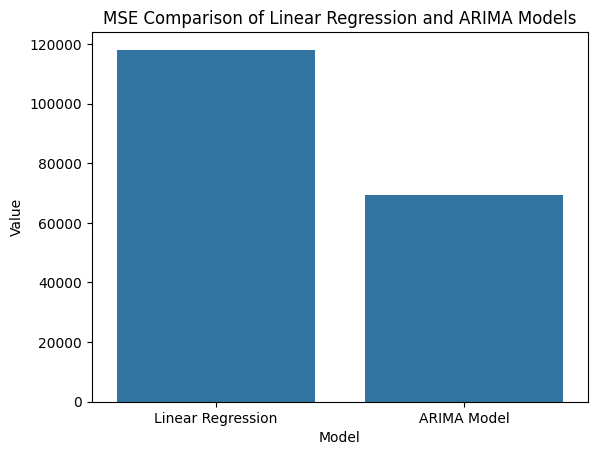

In [ ]:
sns.barplot(data = time_series_mse, x = 'Model', y = 'Value')
plt.title('MSE Comparison of Linear Regression and ARIMA Models')

## Discussion

Overall, learning about ARIMA and time-series analysis was a great experience as it was something I've always wanted to look into. I feel that this method has the potential to bring insightful evidence for policy-makers, environmental stakeholders, and the general public as to how they go about energy consumption in their own perspective country. I would spend more time to understand the parameters, reading the correlation plots, and forecasting actual future values. For a first time-series analysis, I feel that the results of the forecasted values was not too bad.

# Project Summary and Discussion

Although mentioned previously in this project, I feel that the results from the feature importance shed some important insight (again, if the model was fine-tuned better) pertaining to how economic factor heavily influence energy consumption levels. Moreover, with a better decision tree visualization, this could persuade others and decision-makers on what influences energy consumption in their own country.

Learning about ARIMA and time-series in general took me a lot longer than expected, but it was great. There were a lot of bits and pieces to it that I got from many different articles and videos, so I kept going back and forth and trying to piece it together as I went along. This has the potential to actually forecast and predict energy consumption values for a country considering that the dataset goes back 20 years. As mentioned earlier, it has the potential to bring insight to policy-makers, environmentalists, business owners, and country leaders on where their country or home is headed in the near or far future.

A main takeway from this project and analysis is the importance of understanding and intentionally choosing your parameters for your models. I feel that with a better understanding of how to do so, the results from the evaluation metrics for both the random regression and ARIMA models could be greatly improved.

Comparing both models, I feel that the ARIMA model performed better (which is surprising considering that it is the new machine learning model for this project). Both models again have the opportunity to address challenges related to energy consumption and sustainability around the world.

## Future Research and Analysis

With random forest regression, I would better visualize the decision tree and select better parameters. I would also potentially remove variables that didn't rank that high for feature importance and run the model again.

ARIMA Model:
I would want to better understand the math behind the parameters for the ARIMA model and select more appropriate values for p, d, and q. I'd also want to  understand the autocorrelation function (ACF) and Partial Autocorrelation Function (PACF), which goes hand-in-hand with understanding the parameters. I also found an article on AIC and BIC techniques for model selection that would be good to use in the future:
Source: https://medium.com/analytics-vidhya/probabilistic-model-selection-with-aic-bic-in-python-f8471d6add32

Potentially, I'd also forecast actual future values which I saw in a couple of articles that I've read, but couldn't get my code to work to do so. Furthermore, I would perform this model for all the countries, but would probably have to readjust and create more ACF and PACF plots for the parameters. I would also try out the auto.arima function if possible.

## DS495 Project Additions

### Looking at consumption levels overtime for Kiribati

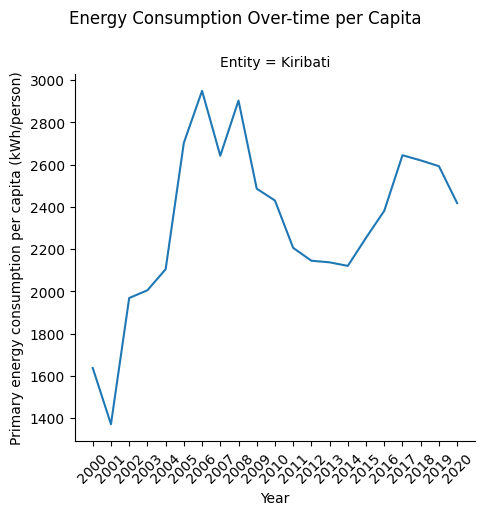

In [ ]:
kiribati_overtime = pd.DataFrame(clean_data[clean_data['Entity'].isin(['Kiribati'])])  # subsetting for Kiribati
kiribati_overtime = kiribati_overtime[['Entity', 'Year', 'Primary energy consumption per capita (kWh/person)']]  # selecting specific columns

kiribati_plot = sns.relplot(
    data=kiribati_overtime,
    x="Year",
    y="Primary energy consumption per capita (kWh/person)",
    kind="line",
    col="Entity"
)

kiribati_plot.fig.suptitle("Energy Consumption Over-time per Capita")
kiribati_plot.fig.subplots_adjust(top=0.85)

# Set x-ticks to be whole numbers
current_ax = kiribati_plot.axes[0, 0]  # accessing the first (and only) subplot
current_ax.set_xticks(range(int(kiribati_overtime['Year'].min()), int(kiribati_overtime['Year'].max()) + 1))
current_ax.set_xticklabels(current_ax.get_xticks(), rotation=45)

plt.show()
kiribati_plot.savefig("kiribati_overtime.png")

### Random Forest Regression for Kiribati